http://ecg4everybody.com/
https://play.google.com/store/apps/details?id=srb.ctb.pulse.heartrate.camera.ecg4everybody

In [3]:
import pandas as pd

In [4]:
data = pd.DataFrame({"datetime": [], "int": []})
data = pd.read_csv("20210614/ecg4everybody_tester_12-08-35_14-06.tsv", sep="	", header=1)
data.head()

,timestamp,value
0,1623665283476,5099860
1,1623665283511,5100085
2,1623665283554,5100731
3,1623665283579,5105342
4,1623665283612,5109183


In [5]:
data.dtypes

timestamp    object
value        object
dtype: object

In [6]:
data.value = pd.to_numeric(data.value, errors='coerce')
data.timestamp = pd.to_numeric(data.timestamp, errors='coerce')

In [7]:
data.dtypes

timestamp    float64
value        float64
dtype: object

In [8]:
data = data.iloc[:data.value[data.value.isna()].index[0],:]

<AxesSubplot:ylabel='value'>

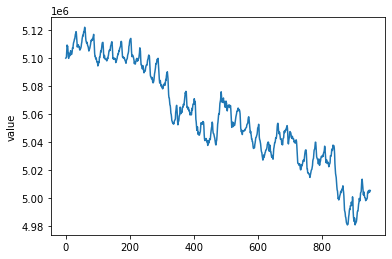

In [9]:
import seaborn as sns
sns.lineplot(y=data.value,x=range(0,len(data.value)))

<AxesSubplot:ylabel='value'>

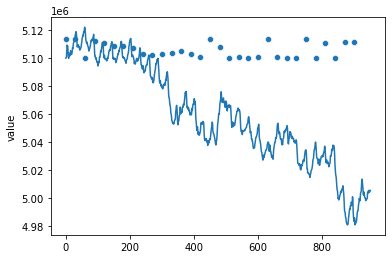

In [10]:
max = []
window = 30
for i in range(0,len(data.value)-window, window):
    max.append(data.value[data.value[i:i+window-1].argmax()])
sns.scatterplot(y=max,x=range(0,len(data.value)-window, window))
sns.lineplot(y=data.value,x=range(0,len(data.value)))

<AxesSubplot:ylabel='value'>

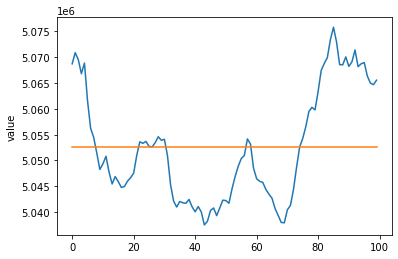

In [11]:
sns.lineplot(y=data.value[400:500],x=range(0,100))
sns.lineplot(y=data.value[400:500].mean(),x=range(0,100))

<AxesSubplot:ylabel='value'>

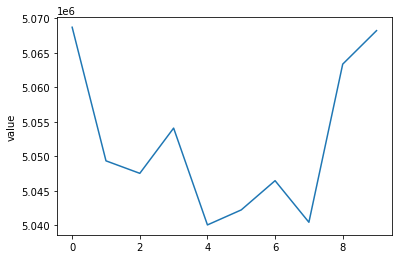

In [12]:
sns.lineplot(y=data.value[range(400,500,10)],x=range(0,10))

<AxesSubplot:ylabel='value'>

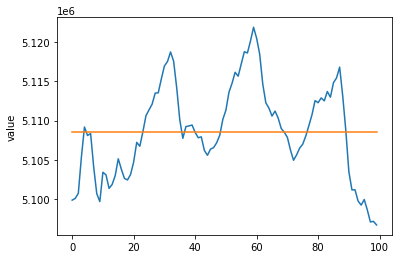

In [13]:
sns.lineplot(y=data.value[0:100],x=range(0,100))
sns.lineplot(y=data.value[0:100].median(),x=range(0,100))

In [14]:
import numpy as np

In [15]:
line = []
for i in range(len(data.value)):
    line.append(int(data.value[i] + (abs(data.value[-1:] - data.value[0]) / len(data.value) * i)))

<AxesSubplot:ylabel='value'>

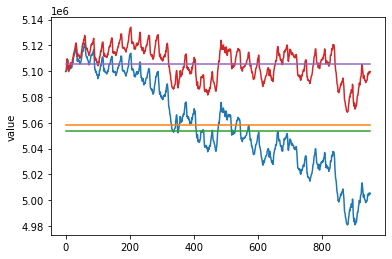

In [16]:
sns.lineplot(y=data.value,x=range(0,len(data.value)))
sns.lineplot(y=data.value.mean(),x=range(0,len(data.value)))
sns.lineplot(y=data.value.median(),x=range(0,len(data.value)))
sns.lineplot(y=line,x=range(0,len(data.value)))
sns.lineplot(y=np.mean(line),x=range(0,len(data.value)))

<AxesSubplot:>

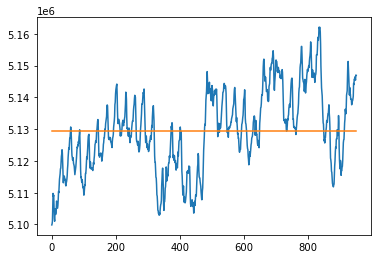

In [17]:
line = []
for i in range(len(data.value)):
    line.append(int(data.value[i] + (abs(data.value[-1:] - data.value[0]) / len(data.value) * i * 1.5)))
sns.lineplot(y=line,x=range(0,len(data.value)))
sns.lineplot(y=np.mean(line),x=range(0,len(data.value)))

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

find_peaks_cwt Find peaks using the wavelet transformation.
peak_prominences Directly calculate the prominence of peaks.
peak_widths Directly calculate the width of peaks.

In [19]:
data.value

0      5099860.0
1      5100085.0
2      5100731.0
3      5105342.0
4      5109183.0
         ...    
946    5005406.0
947    5004668.0
948    5004076.0
949    5005552.0
950    5005330.0
Name: value, Length: 951, dtype: float64

In [20]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

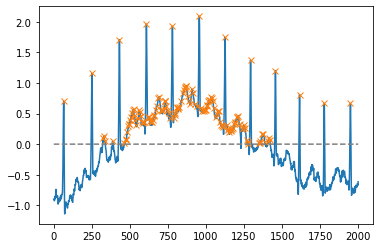

In [21]:
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

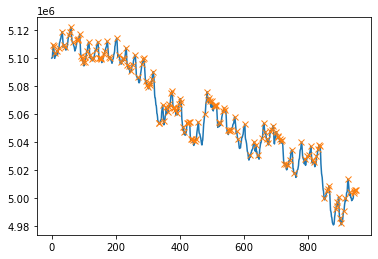

In [30]:
x = data.value
peaks, _ = find_peaks(x)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

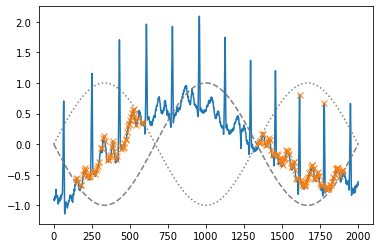

In [22]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

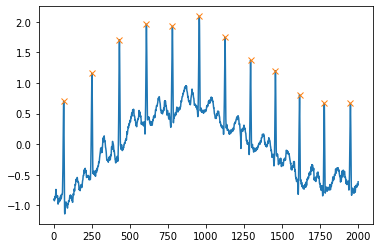

In [24]:
peaks, _ = find_peaks(x, distance=150)
np.diff(peaks)
# array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

[28 27 28 29 28 29 30 28 28 29 29 29 29 26 27 29 28 15 21 17 15 18 31 30
 30 29 16 19 23 30 29 26 31 30 30 24]


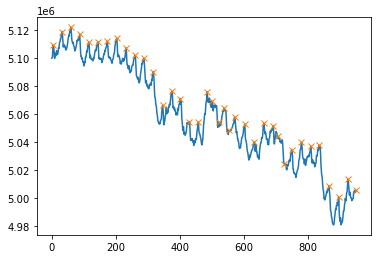

In [36]:
peaks, _ = find_peaks(data.value, distance=15)
print(np.diff(peaks))
# array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

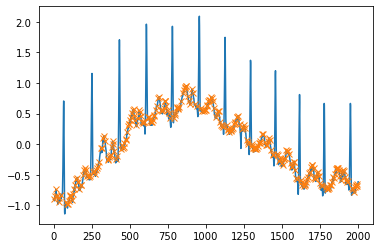

In [25]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
properties["prominences"].max()
# 0.5049999999999999
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

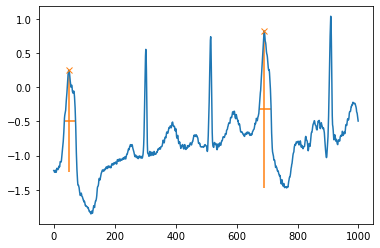

In [26]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]
# (array([1.495, 2.3  ]), array([36.93773946, 39.32723577]))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()